
# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
Data Dictionary

 **PatientId**:Identification of a patient

 **AppointmentID**:Identification of each appointment>

 **Gender**:Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.


 **DataMarcacaoConsulta**:The day of the actuall appointment, when they have to visit the doctor


 **DataAgendamento**:The day someone called or registered the appointment, this is before appointment of course.


 **Age**:How old is the patient.


 **Neighbourhood**:Where the appointment takes place.


 **Scholarship**:True of False . Observation, this is a broad topic, consider reading this article  [her](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)


 **Hipertension**:True or False


 **Diabetes**:True or False


**Alcoholism**:True or False


**Handcap**:True or False


**SMS_received**:1 or more messages sent to the patient.


**No-show**:True or False.

### Question(s) for Analysis

 >what is the percentage of patients who showed up for their appointment?
 
 
 >what is the percentage of genders of patients?
 
 
 >what is the most common disease among patients?
 
 
 >which age was most to show up for their appointment?
 
 
 >Do patients that get SMS reminders to show up more for their appointments?
 
 
 >Which neighborhood has the most outlier disease?

In [196]:
#set up import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [197]:
#load the dataset and show some rows of the data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [198]:
df.head().T

,0,1,2,3,4
PatientId,29872499824296.0,558997776694438.0,4262962299951.0,867951213174.0,8841186448183.0
AppointmentID,5642903,5642503,5642549,5642828,5642494
Gender,F,M,F,F,F
ScheduledDay,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z,2016-04-29T17:29:31Z,2016-04-29T16:07:23Z
AppointmentDay,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z
Age,62,56,62,8,56
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA
Scholarship,0,0,0,0,0
Hipertension,1,0,0,0,1
Diabetes,0,0,0,0,1



### Data Cleaning

 

In [199]:
#first, convert columns name to lowercase
df.columns= df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [200]:
#replace the (-) with an underscore in all columns
df.rename(columns=lambda x: x.replace('-','_'),inplace=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


_the dataset has 110526 rows and 14 columns_

the *no_show,scheduledday,appointmentday and sms_received* data type need to be change

**first** : change the no_show column

In [202]:
#Change the no_show column to be more convenient
df.rename(columns={'no_show':'showed'}, inplace=True)

In [203]:
#reverse the value in the showed column
df['showed'] = df['showed'].apply(lambda x: 1 if x=='No' else 0 )

In [204]:
#change the datatype to boolean
df['showed'] = df['showed'].astype(bool)

In [205]:
df.showed.dtype , df.showed.unique()

(dtype('bool'), array([ True, False]))

In [206]:
#check the new column
df.showed.head()

0    True
1    True
2    True
3    True
4    True
Name: showed, dtype: bool

In [207]:
df.duplicated().sum()

0

In [208]:
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
showed            0
dtype: int64

_there is no duplicate or null values_

In [209]:
#change the  AppointmentDay and ScheduledDay to datetime type
df['AppointmentDay'] = pd.to_datetime(df['appointmentday'])
df['ScheduledDay'] = pd.to_datetime(df['scheduledday'])

In [210]:
#drop unnesasery column
df.drop(['appointmentid'], axis = 1, inplace = True)

In [211]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
patientid,110527.0,1.474963e+14,2.560949e+14,39217.84439,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
age,110527.0,3.708887e+01,2.311020e+01,-1.00000,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
scholarship,110527.0,9.826558e-02,2.976748e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
hipertension,110527.0,1.972459e-01,3.979213e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
diabetes,110527.0,7.186479e-02,2.582651e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
alcoholism,110527.0,3.039981e-02,1.716856e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
handcap,110527.0,2.224796e-02,1.615427e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
sms_received,110527.0,3.210256e-01,4.668727e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


the min value in the age column apper as -1

In [212]:
#locate the age that had the negative value
df.query('age<0')

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed,AppointmentDay,ScheduledDay
99832,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,True,2016-06-06 00:00:00+00:00,2016-06-06 08:58:13+00:00


In [213]:
#drop the negative value
df.drop([99832], axis=0, inplace=True)
df.query('age<0')

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed,AppointmentDay,ScheduledDay


In [214]:
#the counts for female and male patients
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 :  what is the percentage of patients who showed up for their appointment?

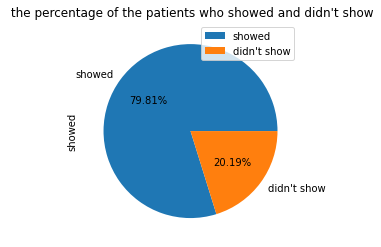

In [215]:
df_showed = df.showed.value_counts()
df_showed.plot(kind="pie",figsize = (4,4),labels=["showed","didn't show"], autopct='%1.2f%%' )
plt.title(" the percentage of the patients who showed and didn't show")
plt.legend()

about **80%** of patients showed up for thier appointment

### Research Question 2   what is the percentage of genders of patients?

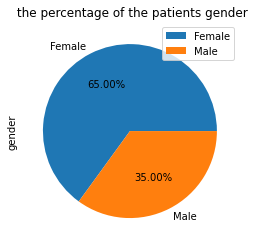

In [216]:

df_gender = df.gender.value_counts()
df_gender.plot(kind="pie",figsize = (4,4),labels=["Female","Male"], autopct='%1.2f%%' )
plt.title(" the percentage of the patients gender")
plt.legend()

look like there are female patients more than male

### Research Question 3   what is the most common disease among patients?

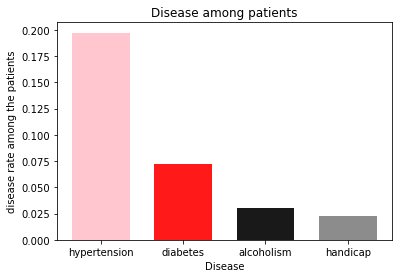

In [217]:
locations = [1, 2, 3, 4]
colors = ['pink', 'red', 'black', 'grey']
heights = [df.hipertension.mean(),df.diabetes.mean(),df.alcoholism.mean(),df.handcap.mean()]
labels = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
plt.bar(locations,heights,color=colors, width = .7 , alpha=.9);
plt.title('Disease among patients')
plt.xlabel('Disease')
plt.ylabel('disease rate among the patients')
plt.xticks(locations, labels);

the majority of patients have Hypertension AND then Diabetes, Alcoholism, and handicaps with this order

### Research Question 4   which age was most to show up for their appointment?

Text(0.5, 0, 'Age')

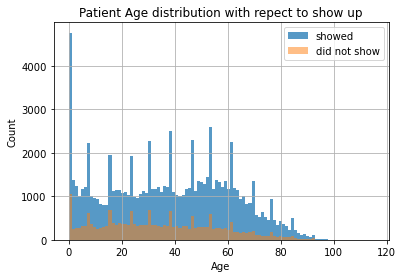

In [218]:
# visualizing the correlation between age and count of patients and the show no show state
#plt.hist(df['age'],bins=100, color = 'red')
#plt.title('Age vs number of patients')
showed = df['showed'] == True
did_not_show = df['showed'] == False
df[showed].age.hist(alpha = 0.75, bins = 100 , label = 'showed')
df[did_not_show].age.hist(alpha = 0.5, bins = 100 , label = 'did not show')
plt.title('Patient Age distribution with repect to show up')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Age')

In [219]:
#create function for plotting
def bar_plot(x,y,z):
    x.plot(kind = 'bar',figsize= z)
    plt.title(y)
    plt.legend()

the majority of the patients are children

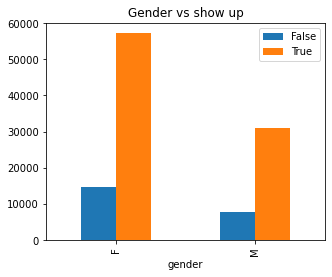

In [220]:
#check the correlation between showing up for  appointments and gender type
show_vs_gender = df.groupby('gender')['showed'].value_counts().unstack()
bar_plot(show_vs_gender,'Gender vs show up',(5,4))

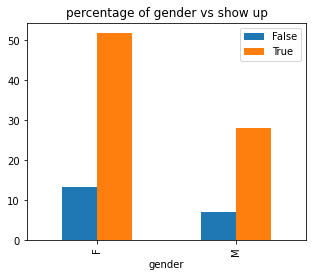

In [221]:
#the percentage of gender type and percentage  whether they show up for their appointment or not
pres = (show_vs_gender/len(df)*100)
bar_plot(pres,'percentage of gender vs show up',(5,4))

In [222]:
round(show_vs_gender/len(df)*100).transpose()

gender,F,M
showed,,
False,13.0,7.0
True,52.0,28.0


In [223]:
round((13/52)*100),round((7/28)*100)

(25, 25)

from the bar chart we can see the gender didn't **affects attendance**

### Research Question 5 : Do patients that get SMS reminders to show up more for their appointments?

In [224]:
# use groupby to get the count of who received the SMS and showed up
sms_vs_show = df.groupby(['sms_received','showed']).count()['age']
sms_vs_show

sms_received  showed
0             False     12535
              True      62509
1             False      9784
              True      25698
Name: age, dtype: int64

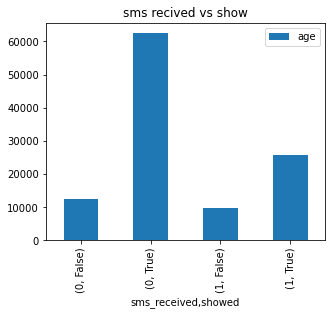

In [225]:
bar_plot(sms_vs_show,'sms recived vs show',(5,4))

there is __no correlation__ between receiving SMS reminder and showing up for the appointment

### Research Question 6 : Which neighborhood has the most outlier disease?

In [226]:
alcoholism = df.groupby('neighbourhood').alcoholism.mean()
handcap = df.groupby('neighbourhood').handcap.mean()
hipertension = df.groupby('neighbourhood').hipertension.mean()
diabetes = df.groupby('neighbourhood').diabetes.mean()


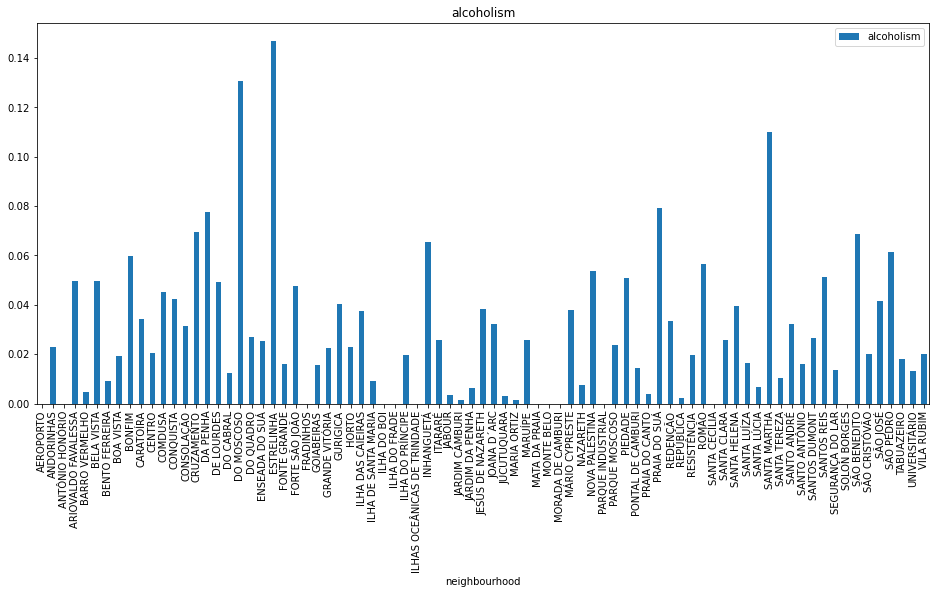

In [227]:
bar_plot(alcoholism,'alcoholism',(16,7))

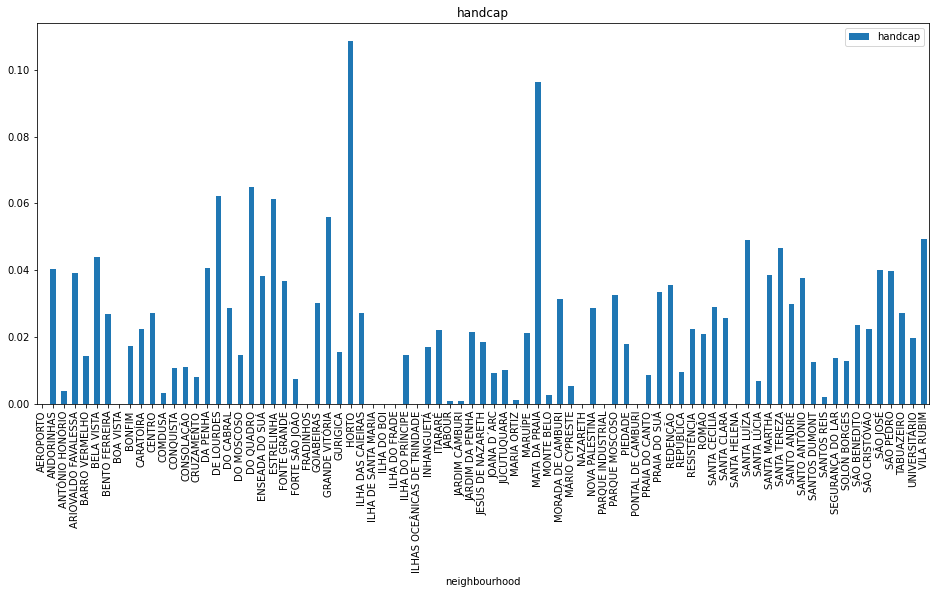

In [228]:
bar_plot(handcap,'handcap',(16,7))

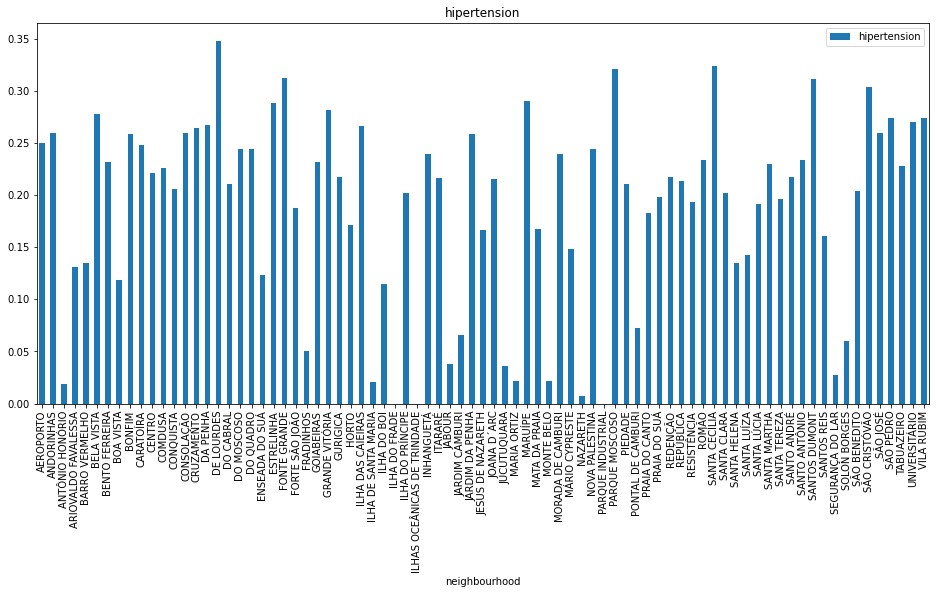

In [229]:
bar_plot(hipertension,'hipertension',(16,7))

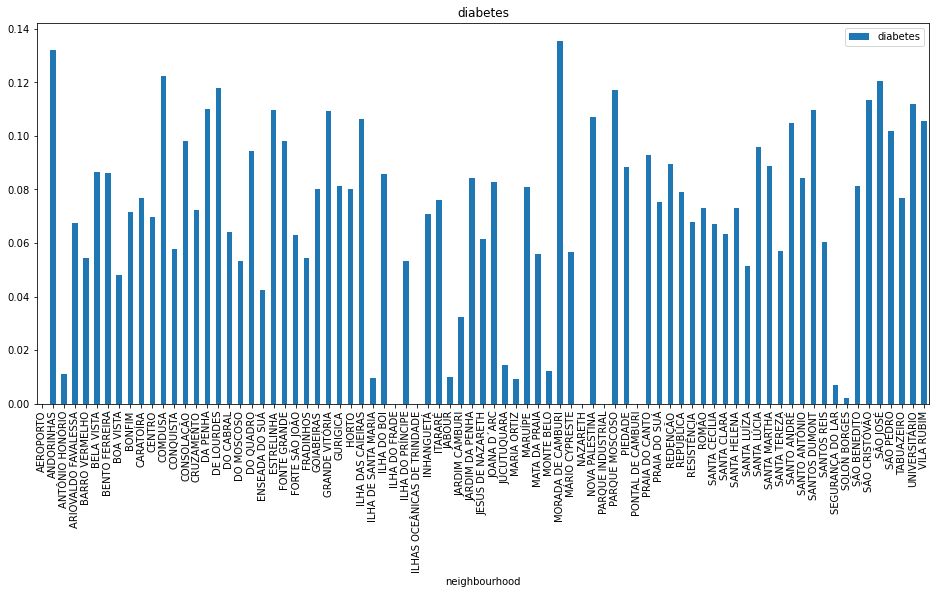

In [230]:
bar_plot(diabetes,'diabetes',(16,7))

<a id='conclusions'></a>
## Conclusions



> since Females makes about 65% of the population and are more likely to show up for appointments compared to males. this indicate female are take care of their health more than male,But in the other hand we can see the percentage of show up  compare to the total population of each gender is the same as 25%

>It has been observed that the most common diseases among patients are hypertension and diabetes

>the majority of the patients are children which means the parents are taking care of their children

>about **80%** of patients showed up for thier appointment


>handcap is higher remarkably among two neighbourhood HORTO and MA DA PRAIA

>there is __no correlation__ between receiving SMS reminder and showing up for the appointment

>the no show column observations is inconsistent because it took the negative format and that make it inconvenient to work with


## Limitations:
>most observation on the dataset are limited because its took only two value 0 ,1 and this limit the investigation that can be conducted on this dataset

>

## sources
https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/
http://net-informations.com/python/err/eol.htm
https://stackoverflow.com/questions/71369078/init-got-an-unexpected-keyword-argument-max-rows
https://www.codegrepper.com/code-examples/python/pandas+convert+all+column+names+to+lowercase
https://stackoverflow.com/questions/69447168/creating-pie-chart-from-one-column-that-has-multiple-duplicate-values-values
https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart




In [231]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1